Using Colab cache for faster access to the 'titanic-dataset' dataset.
Path to dataset files: /kaggle/input/titanic-dataset

First 5 Rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101

/tmp/ipython-input-3005502063.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3005502063.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

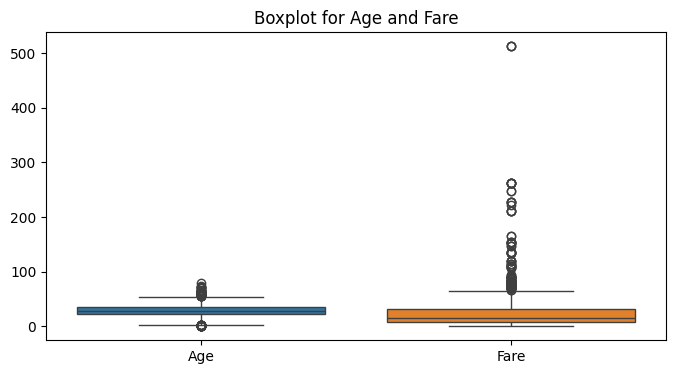


Shape After Removing Outliers: (577, 8)

Final Processed Data (First 5 rows):
   Survived   Pclass       Sex       Age     SibSp  Parch      Fare  Embarked
0 -0.654384  0.67833  0.574015 -0.854761  1.800735    0.0 -0.609448  0.541069
1  1.528156  0.67833 -1.742115 -0.386610 -0.448235    0.0 -0.555858  0.541069
2  1.528156 -2.04917 -1.742115  0.666730  1.800735    0.0  3.030715  0.541069
3 -0.654384  0.67833  0.574015  0.666730 -0.448235    0.0 -0.545934  0.541069
4 -0.654384  0.67833  0.574015 -0.152535 -0.448235    0.0 -0.513517 -0.852667

✅ Preprocessing Completed Successfully!


In [8]:
# ==========================================
# AI & ML Internship - Task 1
# Data Cleaning & Preprocessing


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1.Import the dataset and explore basic info (nulls, data types)
path = kagglehub.dataset_download("yasserh/titanic-dataset")
print("Path to dataset files:", path)

# Load CSV file
file_path = os.path.join(path, "Titanic-Dataset.csv")
df = pd.read_csv(file_path)

print("\nFirst 5 Rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values Before Handling:")
print(df.isnull().sum())

# 2. Handle missing values using mean/median/imputation.


# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)

print("\nMissing Values After Handling:")
print(df.isnull().sum())

#3. Convert categorical features into numerical using encoding.

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# 4.Normalize/standardize the numerical features.
columns_to_drop = ['Name', 'Ticket', 'PassengerId']
df.drop([col for col in columns_to_drop if col in df.columns],
        axis=1, inplace=True)


# 5.Visualize outliers using boxplots and remove them.


plt.figure(figsize=(8,4))
sns.boxplot(data=df[['Age','Fare']])
plt.title("Boxplot for Age and Fare")
plt.show()

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |
          (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nShape After Removing Outliers:", df.shape)


# 6. Feature Scaling (Standardization)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

print("\nFinal Processed Data (First 5 rows):")
print(df_scaled.head())

# 7. Save Cleaned Dataset

df_scaled.to_csv("cleaned_titanic.csv", index=False)

print("\n✅ Preprocessing Completed Successfully!")
